<a href="https://colab.research.google.com/github/sakuna47/Credit_Card_Fraud_Detection/blob/Backend/CrdtCrdFrdDtctn_Backend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy scikit-learn imbalanced-learn tensorflow flask matplotlib seaborn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import IsolationForest
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
import flask
from flask import Flask, request, render_template

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
# Adjust the path to match your Google Drive location
file_path = "/content/drive/My Drive/Credit Card Fraud Detection/creditcard.csv"
df = pd.read_csv(file_path)

# Check class distribution
print(df["Class"].value_counts(normalize=True))

# Check missing values
print(df.isnull().sum())

# Display basic information about the dataset
print(df.info())

# Show first five rows
print(df.head())

# Check for duplicate values
print(f"Duplicated rows: {df.duplicated().sum()}")

# Summary statistics
print(df.describe())




Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807

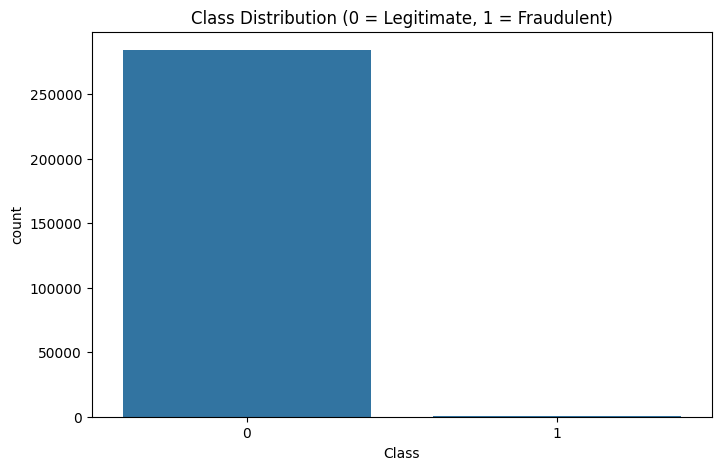

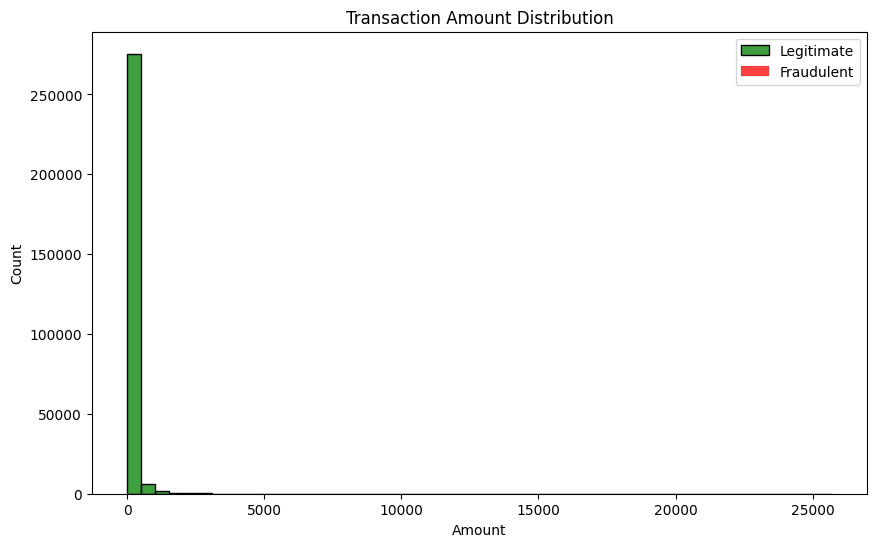

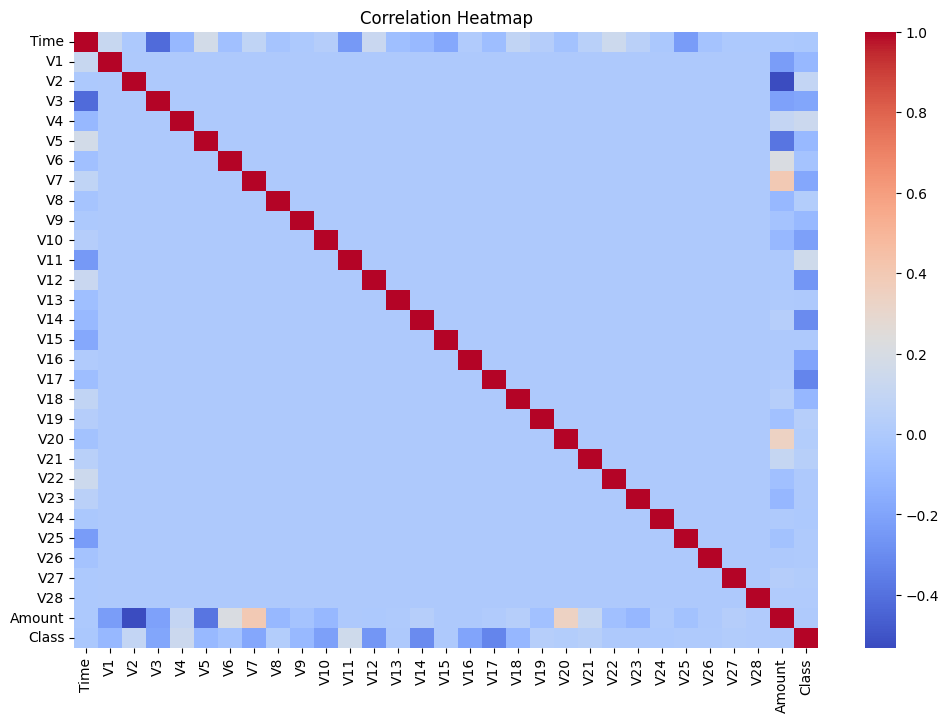

In [6]:
#Data visualization
# Class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x="Class", data=df)
plt.title("Class Distribution (0 = Legitimate, 1 = Fraudulent)")
plt.show()

# Transaction amount distribution
plt.figure(figsize=(10, 6))
sns.histplot(df[df["Class"] == 0]["Amount"], bins=50, color="green", label="Legitimate")
sns.histplot(df[df["Class"] == 1]["Amount"], bins=50, color="red", label="Fraudulent")
plt.legend()
plt.title("Transaction Amount Distribution")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [7]:
# Data preprocessing

# Fill missing values with median
df.fillna(df.median(), inplace=True)# There is no missing value just for practice

In [8]:
#Outlier Detection
# Initialize Isolation Forest
from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(contamination=0.01, random_state=42)
outliers = iso_forest.fit_predict(df.drop("Class", axis=1))

# Remove outliers
df = df[outliers == 1]